In [1]:
import os, sys

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import astropy.units as u
from astropy.time import Time
import astropy.coordinates as coord
from mpl_toolkits.mplot3d import Axes3D

!pip install twobody
from twobody import KeplerOrbit, Barycenter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 467 kB 4.0 MB/s 


In [2]:
from google.colab import drive 
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Teaching/Resources/MyDemos')

Mounted at /content/drive


In [193]:
# kludge to make the 2001 opposition line up correctly. 
# It does not get the 2003 opposition correct, however
# And the 2003 opposition was supposed to take place near perihelion
# https://hubblesite.org/contents/news-releases/2003/news-2003-22.html#:~:text=BACKGROUND%20INFORMATION%3A%20MARS%20'CLOSE%20ENCOUNTER'%20WITH%20EARTH&text=On%20August%2027%2C%202003%2C%20the,will%20be%20unusually%20close%3A%20Opposition.
t0 = Time('2003-08-27 08:52:31.539',format="iso") - Time('2003-04-28 08:04:41.387',format="iso")
# t0 = Time('2001-06-13 08:52:31.539',format="iso") - Time('2001-03-16 08:52:31.539',format="iso")
print(t0)

121.03321935185186


In [194]:
# longitude of the ascending node, Ω; the argument of pericenter, 𝜔
# mean anomaly, 𝑀
# https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html
# https://nssdc.gsfc.nasa.gov/planetary/factsheet/marsfact.html


varpi_earth = 102.94719*u.deg 
earth = KeplerOrbit(P=1*u.year, e=0.0167,
                  omega=102.94719*u.deg, i=0.00005*u.deg, Omega=-11.26064*u.deg,
                  M0=35.824*u.deg, t0=Time('J2000.0')+t0)
# I used "Mean Longitude (deg)" for M0 but I don't think that's right
# Murray and Correira define the mean longitude as M - varpi, 
# where varpi is the longitude of periapse
# and varpi = Ω + 𝜔

varpi_mars = 336.04084*u.deg
mars = KeplerOrbit(P=1.881*u.year, e=0.09341233,
                  omega=336.04084*u.deg, i=1.85061*u.deg, Omega=49.57854*u.deg,
                  M0=355.45332*u.deg, t0=Time('J2000.0')+t0)

In [195]:
p_e = earth.elements.P.to(u.day).value
p_m = mars.elements.P.to(u.day).value
p_syn = (p_e * p_m / (p_m - p_e))*u.day
print(p_syn,p_syn.to(u.year))

779.8356980703745 d 2.1350737797956865 yr


In [196]:
t = Time('2000-01-01') + np.linspace(0, 4, 2048) * u.year

In [197]:
eq1 = KeplerOrbit(earth.elements)
eq2 = KeplerOrbit(mars.elements)

In [198]:
eq2.barycenter

In [199]:
ra_deg = (18+42/60+21/3600)*15
dec_deg = -23+4/60+47/3600
origin = coord.ICRS(ra=ra_deg*u.deg, dec=dec_deg*u.deg,
                    distance=1*u.au)
b = Barycenter(origin=origin, t0=Time('J2000'))
xyz1 = eq1.orbital_plane(t)
XYZ1 = eq1.reference_plane(t).cartesian
xyz2 = eq2.orbital_plane(t)
XYZ2 = eq2.reference_plane(t).cartesian

RPZ1 = eq1.reference_plane(t).cylindrical
RPZ2 = eq2.reference_plane(t).cylindrical

In [234]:
orbit_style1 = dict(marker='', linestyle='-', linewidth=1, color='C0')
orbit_style2 = dict(marker='', linestyle='-', linewidth=1, color='C1')
trail_style1 = dict(marker='o',  s=4, cmap="Blues_r")
trail_style2 = dict(marker='o',  s=4, cmap="Oranges_r")
body_style1 = dict(marker='o', linestyle='none', color='DarkBlue',
                  markersize=10, zorder=100)
body_style2 = dict(marker='o', linestyle='none', color='DarkRed',
                  markersize=10, zorder=100)
barycen_style = dict(marker='o', color='goldenrod', mew=2, ms=8)

In [235]:
tol = 1.8e-1 * u.degree
close_idx = np.where((abs(RPZ1.phi-RPZ2.phi)<tol))[0]
print(close_idx)
print(t[close_idx])

[ 787 1870]
['2001-07-15 16:52:59.678' '2003-08-27 16:05:09.526']


Text(0.5, 1.0, '2003-08-27')

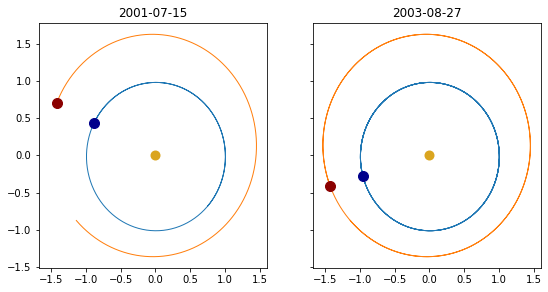

In [236]:
fig, axes = plt.subplots(1, 2, figsize=(9,4.5),
                         sharex=True, sharey=True)

i = close_idx[0]
axes[0].plot(XYZ1.x[:i], XYZ1.y[:i], **orbit_style1)
axes[0].plot(XYZ2.x[:i]*1.5, XYZ2.y[:i]*1.5, **orbit_style2)
axes[0].plot(XYZ1.x[i], XYZ1.y[i], **body_style1)
axes[0].plot(XYZ2.x[i]*1.5, XYZ2.y[i]*1.5, **body_style2)
axes[0].plot(0, 0, **barycen_style)
axes[0].set_title(t[i].iso.split()[0])
# axes[0].tick_params(labelbottom=False,labelleft=False)

i = close_idx[1]
axes[1].plot(XYZ1.x[:i], XYZ1.y[:i], **orbit_style1)
axes[1].plot(XYZ2.x[:i]*1.5, XYZ2.y[:i]*1.5, **orbit_style2)
axes[1].plot(XYZ1.x[i], XYZ1.y[i], **body_style1)
axes[1].plot(XYZ2.x[i]*1.5, XYZ2.y[i]*1.5, **body_style2)
axes[1].plot(0, 0, **barycen_style)
axes[1].set_title(t[i].iso.split()[0])
# axes[1].tick_params(labelbottom=False,labelleft=False)


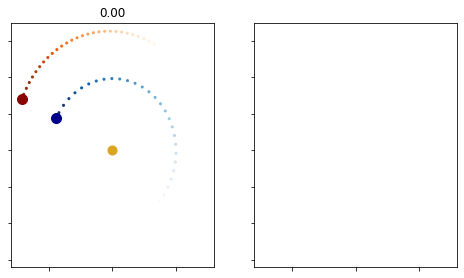

In [239]:
fig, axes = plt.subplots(1, 2, figsize=(8,4.5),
                         sharex=True, sharey=True)

nsteps = len(t)
for i in range(nsteps)[close_idx[0]-1:]:

  # count the numerical days relative to the first opposition
  day = (t[i] - t[close_idx[0]]).to(u.day).value

  # count the days relative to the current date
  # This will be negative for upcoming days
  trail_day = (t[i] - t).to(u.day).value
  # Want to plot the trail for every ~nth previous point, fading out over time
  trail_idx0 = np.where((trail_day>0) & (trail_day<200))[0]
  trail_mod = trail_idx0 % 10
  trail_idx = trail_idx0[trail_mod==0]

  if i<=close_idx[0]:
    # axes[0].plot(XYZ1.x[:i], XYZ1.y[:i], **orbit_style1)
    # axes[0].plot(XYZ2.x[:i]*1.5, XYZ2.y[:i]*1.5, **orbit_style2)
    axes[0].scatter(XYZ1.x[trail_idx], XYZ1.y[trail_idx],
                    c=trail_day[trail_idx], **trail_style1)
    axes[0].scatter(XYZ2.x[trail_idx]*1.5, XYZ2.y[trail_idx]*1.5,
                    c=trail_day[trail_idx], **trail_style2)
    axes[0].plot(XYZ1.x[i], XYZ1.y[i], **body_style1)
    axes[0].plot(XYZ2.x[i]*1.5, XYZ2.y[i]*1.5, **body_style2)
    axes[0].plot(0, 0, **barycen_style)
    axes[0].set_title(f"{day:.2f}")
    axes[0].set_xlim(-1.6,1.6)
    axes[0].set_ylim(-1.6,1.75)
    axes[0].tick_params(labelbottom=False,labelleft=False)

  if i<=close_idx[1]:
    # axes[1].plot(XYZ1.x[:i], XYZ1.y[:i], **orbit_style1)
    # axes[1].plot(XYZ2.x[:i]*1.5, XYZ2.y[:i]*1.5, **orbit_style2)
    axes[1].scatter(XYZ1.x[trail_idx], XYZ1.y[trail_idx],
                    c=trail_day[trail_idx], **trail_style1)
    axes[1].scatter(XYZ2.x[trail_idx]*1.5, XYZ2.y[trail_idx]*1.5,
                    c=trail_day[trail_idx], **trail_style2)
    axes[1].plot(XYZ1.x[i], XYZ1.y[i], **body_style1)
    axes[1].plot(XYZ2.x[i]*1.5, XYZ2.y[i]*1.5, **body_style2)
    axes[1].plot(0, 0, **barycen_style)
    axes[1].set_title(f"{day:.2f}")
    axes[1].set_xlim(-1.6,1.6)
    axes[1].set_ylim(-1.6,1.75)
    axes[1].tick_params(labelbottom=False,labelleft=False)

    plt.savefig(f"frames/synodic_earth_mars_{i:06d}.png",
                dpi=600,bbox_inches="tight")
    
    axes[1].clear()
    if i<close_idx[0]:
        axes[0].clear()

  else:
    break

